In [1]:
import numpy as np
import anndata as ad
from sklearn.metrics import calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
input_dir = "/Users/apple/Desktop/KB/data"

X_02_setA = np.load(input_dir+"/feat_629/feat_629__bs15_temp0.5_sf0.2_setA/scBaseEncoderFeat_Z_bs15_tau0.5.npy")
X_03_setA = np.load(input_dir+"/feat_629/feat_629__bs15_temp0.5_sf0.3_setA/scBaseEncoderFeat_Z_bs15_tau0.5.npy")
X_04_setA = np.load(input_dir+"/feat_629/feat_629__bs15_temp0.5_sf0.4_setA/scBaseEncoderFeat_Z_bs15_tau0.5.npy")
X_05_setA = np.load(input_dir+"/feat_629/feat_629__bs15_temp0.5_sf0.5_setA/scBaseEncoderFeat_Z_bs15_tau0.5.npy")

X_02_setB = np.load(input_dir+"/feat_629/feat_629__bs15_temp0.5_sf0.2_setB/scBaseEncoderFeat_Z_bs15_tau0.5.npy")
X_03_setB = np.load(input_dir+"/feat_629/feat_629__bs15_temp0.5_sf0.3_setB/scBaseEncoderFeat_Z_bs15_tau0.5.npy")
X_04_setB = np.load(input_dir+"/feat_629/feat_629__bs15_temp0.5_sf0.4_setB/scBaseEncoderFeat_Z_bs15_tau0.5.npy")
X_05_setB = np.load(input_dir+"/feat_629/feat_629__bs15_temp0.5_sf0.5_setB/scBaseEncoderFeat_Z_bs15_tau0.5.npy")

adata_setA = ad.read_h5ad(input_dir+'/LarryData/Larry_Day/LarryData_setA.h5ad')
adata_setB = ad.read_h5ad(input_dir+'/LarryData/Larry_Day/LarryData_setB.h5ad')
lineage_label_setA = adata_setA.obs["clone_id"].to_numpy()
lineage_label_setB = adata_setB.obs["clone_id"].to_numpy()

In [3]:
X_02_setA.shape, X_02_setB.shape

((41201, 64), (40520, 64))

In [4]:
score_02_setA = calinski_harabasz_score(X_02_setA, lineage_label_setA)
score_03_setA = calinski_harabasz_score(X_03_setA, lineage_label_setA)
score_04_setA = calinski_harabasz_score(X_04_setA, lineage_label_setA)
score_05_setA = calinski_harabasz_score(X_05_setA, lineage_label_setA)

score_02_setB = calinski_harabasz_score(X_02_setB, lineage_label_setB)
score_03_setB = calinski_harabasz_score(X_03_setB, lineage_label_setB)
score_04_setB = calinski_harabasz_score(X_04_setB, lineage_label_setB)
score_05_setB = calinski_harabasz_score(X_05_setB, lineage_label_setB)

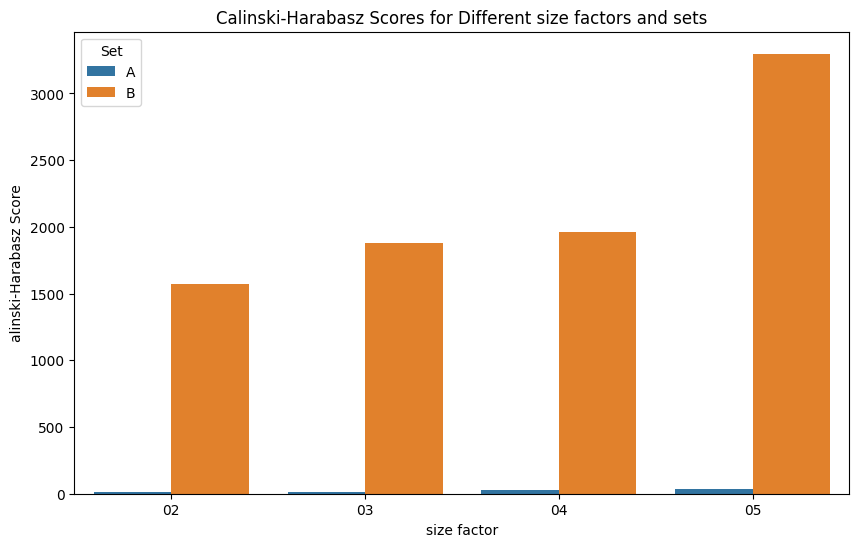

In [5]:
# Combine scores and labels into a DataFrame
data = {
    'Score': [score_02_setA, score_02_setB, score_03_setA, score_03_setB, 
              score_04_setA, score_04_setB, score_05_setA, score_05_setB],
    'Size factor': ['02'] * 2 + ['03'] * 2 + ['04'] * 2 + ['05'] * 2,
    'Set': ['A', 'B'] * 4
}

df = pd.DataFrame(data)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Size factor', y='Score', hue='Set')
plt.xlabel('size factor')
plt.ylabel('alinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Different size factors and sets')
plt.show()

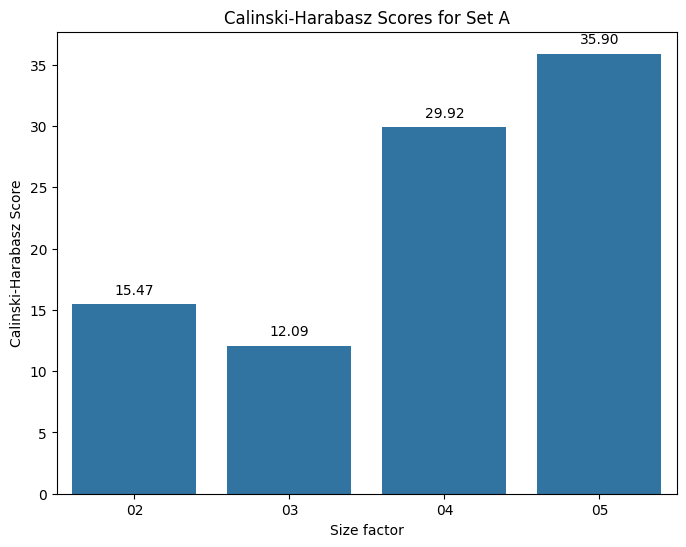

In [6]:
data_A = {
    'Score': [score_02_setA, score_03_setA, score_04_setA, score_05_setA],
    'Size factor': ['02', '03', '04', '05']
}
df_A = pd.DataFrame(data_A)

data_B = {
    'Score': [score_02_setB, score_03_setB, score_04_setB, score_05_setB],
    'Size factor': ['02', '03', '04', '05']
}
df_B = pd.DataFrame(data_B)


def add_labels(df, ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Create bar plot for Set A
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_A, x='Size factor', y='Score')
add_labels(df_A, ax)
plt.title('Calinski-Harabasz Scores for Set A')
plt.xlabel('Size factor')
plt.ylabel('Calinski-Harabasz Score')
plt.show()



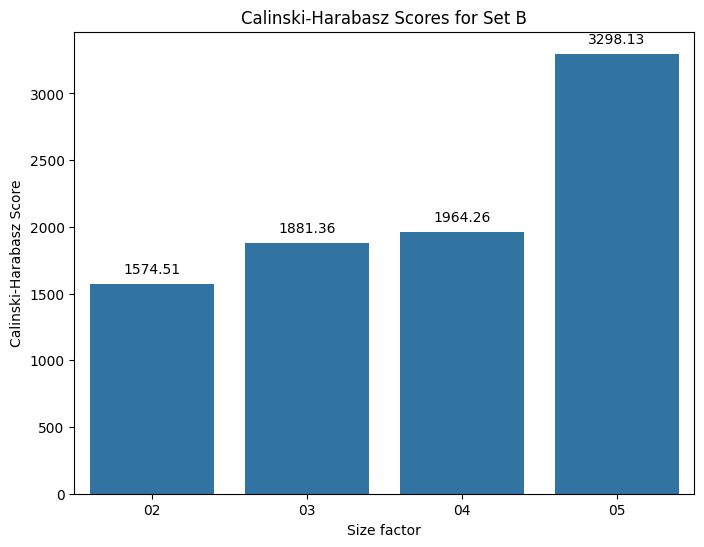

In [7]:
# Create bar plot for Set B
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_B, x='Size factor', y='Score')
add_labels(df_B, ax)
plt.title('Calinski-Harabasz Scores for Set B')
plt.xlabel('Size factor')
plt.ylabel('Calinski-Harabasz Score')
plt.show()